Develop a model to predict individual medical insurance charges based on personal attributes.

**Dataset Overview:-**

The dataset contains 1,338 records with the following features:


*   age: Age of the individual
*   sex: Gender (male/female)
*   bmi: Body Mass Index
*   children: Number of children covered by insurance
*   smoker: Smoking status (yes/no)
*   region: Residential region in the U.S. (northeast, southeast, southwest,
     northwest)
*   charges: Medical insurance charges (target variable)


In [157]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**DATA EXPLORATION**

**First of all,we need to familarize with our data.Doing this will help us to understand the attributes and extracting some information from them.**

In [158]:
#Importing dataset
Insurance_data=pd.read_csv('/content/insurance.csv')
Insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [159]:
#shape if the dataset
Insurance_data.shape

(1338, 7)

In [160]:
#general information about the dataset
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [161]:
#statistical information about the dataset
Insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**1.Understand the distribution of each feature.**

For numerical features:Use Histograms

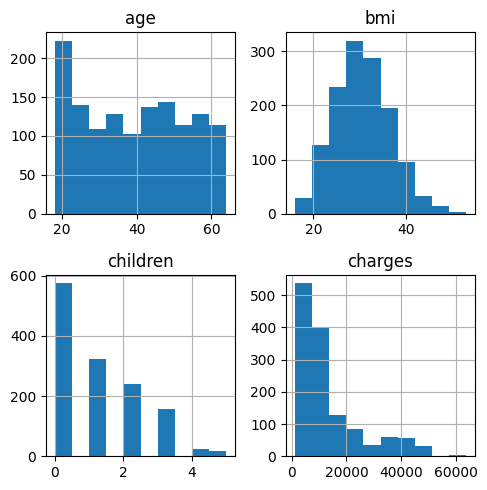

In [162]:
# Histograms
Insurance_data.hist(figsize=(5,5))
plt.tight_layout()
plt.show()


For categorical features:Use Countplot and value counts





In [163]:
# Value counts
print(Insurance_data['sex'].value_counts())
print(Insurance_data['smoker'].value_counts())
print(Insurance_data['region'].value_counts())


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


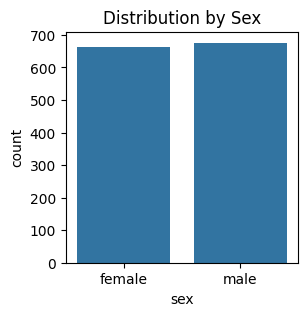

In [164]:
# Countplot for sex
plt.figure(figsize=(3,3))
plt.title('Distribution by Sex')
sns.countplot(data=Insurance_data, x='sex')
plt.show()


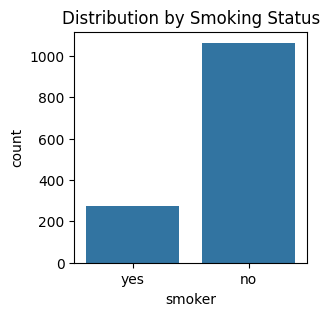

In [165]:
#Countplot for smoker
plt.figure(figsize=(3,3))
plt.title('Distribution by Smoking Status')
sns.countplot(data=Insurance_data, x='smoker')
plt.show()


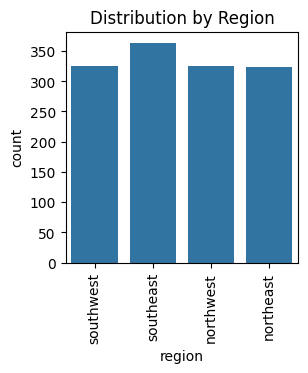

In [166]:
#Countplot for region
plt.figure(figsize=(3,3))
plt.title('Distribution by Region')
sns.countplot(data=Insurance_data, x='region')
plt.xticks(rotation=90)
plt.show()

**2.Identify relationships between features and the target variable.(target=charges)**

Numerical vs Target:Use Scatterplot

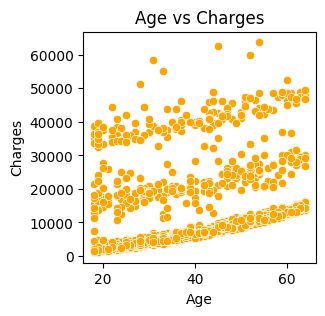

In [167]:
#numerical Age vs Charges
plt.figure(figsize=(3,3))
sns.scatterplot(x='age',y='charges',data=Insurance_data,color='orange')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()


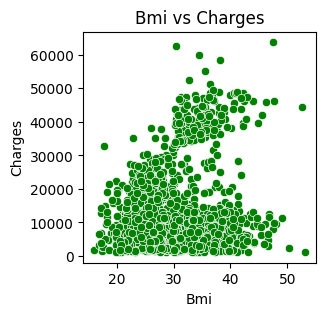

In [168]:
#bmi vs Charges
plt.figure(figsize=(3,3))
sns.scatterplot(x='bmi',y='charges',data=Insurance_data,color='green')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.title('Bmi vs Charges')
plt.show()

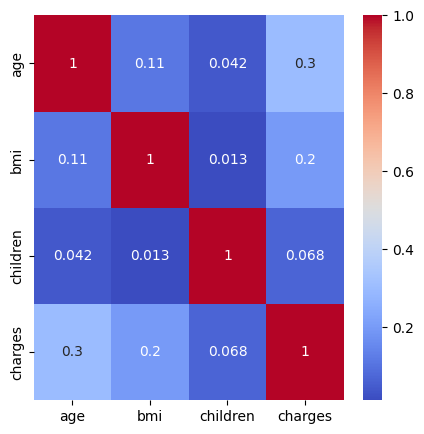

In [169]:
# Correlation heatmap
plt.figure(figsize=(5,5))
sns.heatmap(Insurance_data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Categorical vs Target:Use Boxplot

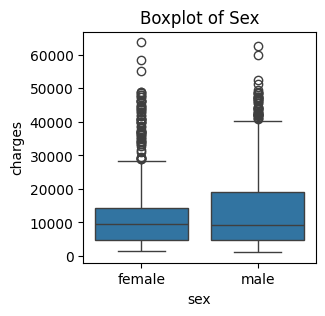

In [170]:
#Boxplot for sex vs charges
plt.figure(figsize=(3,3))
plt.title('Boxplot of Sex')
sns.boxplot(data=Insurance_data, x='sex', y='charges')
plt.show()

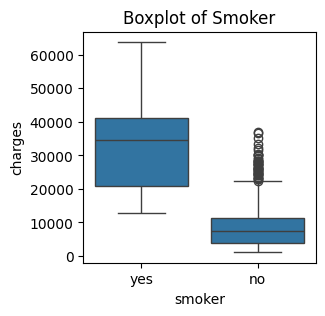

In [171]:
#Boxplot for smoker vs charges
plt.figure(figsize=(3,3))
plt.title('Boxplot of Smoker')
sns.boxplot(data=Insurance_data, x='smoker', y='charges')
plt.show()

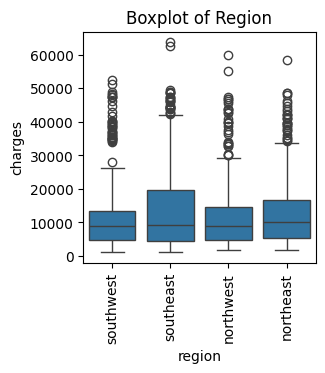

In [172]:
#Boxplot for region vs charges
plt.figure(figsize=(3,3))
plt.title('Boxplot of Region')
sns.boxplot(data=Insurance_data, x='region', y='charges')
plt.xticks(rotation=90)
plt.show()

## **DATA PREPROCESSING**

**1.Handle missing values**

In [173]:
#counting the missing values
Insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


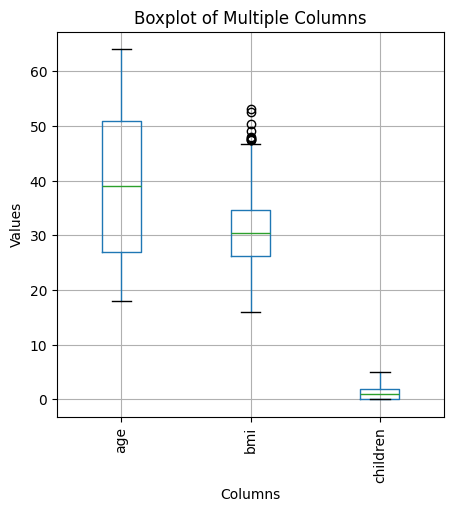

In [174]:
#Checking the columns to apply the outlier treatment using boxplot
# List of columns to include in the boxplot
columns_to_plot = ['age','bmi','children']
# Create boxplot
plt.figure(figsize=(5,5))
Insurance_data[columns_to_plot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Boxplot of Bmi')

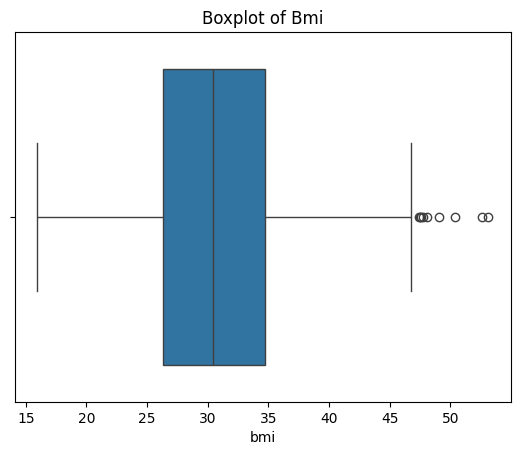

In [175]:
# Boxplot of the bmi before outlier treatment.
sns.boxplot(x=Insurance_data['bmi'],data=Insurance_data)
plt.title('Boxplot of Bmi')

In [176]:
#Outlier treatment for bmi
Q1=Insurance_data['bmi'].quantile(0.25)
Q2=Insurance_data['bmi'].quantile(0.5)
Q3=Insurance_data['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('The lower_bound is',lower_bound)
print('The upper_bound is',upper_bound)
Insurance_data['bmi'] = np.where(Insurance_data['bmi'] < lower_bound, lower_bound, Insurance_data['bmi'])
Insurance_data['bmi'] = np.where(Insurance_data['bmi'] > upper_bound, upper_bound, Insurance_data['bmi'])


The lower_bound is 13.7
The upper_bound is 47.290000000000006


Text(0.5, 1.0, 'Boxplot of Bmi')

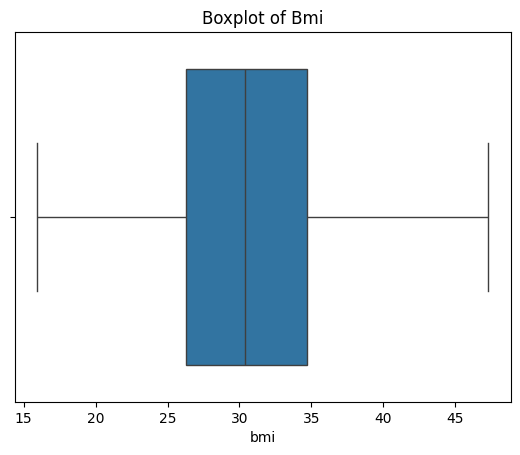

In [177]:
# Boxplot of the bmi after outlier treatment.
sns.boxplot(x=Insurance_data['bmi'],data=Insurance_data)
plt.title('Boxplot of Bmi')

**2.Encode categorical variables appropriately.**

In [178]:
#We transform to numerical our categorical attributes
from sklearn.preprocessing import LabelEncoder

categorical_cols_label = ['sex','smoker','region']

# Initialize LabelEncoder
label_encoders = {}

# Label encode ordinal categorical columns
for col in categorical_cols_label:
    le = LabelEncoder()
    Insurance_data[col] = le.fit_transform(Insurance_data[col])
    label_encoders[col] = le

Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


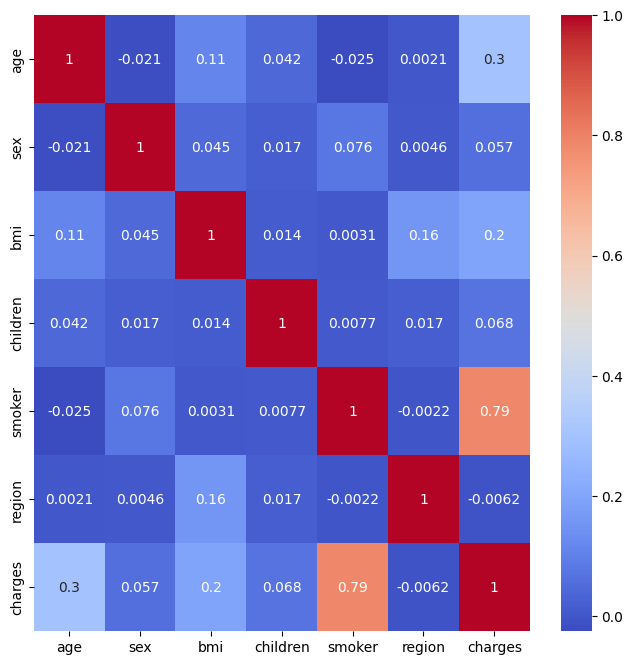

In [179]:
#heatmap
plt.figure(figsize=(8,8))
sns.heatmap(Insurance_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [180]:
# Calculate correlation matrix
correlation_matrix =Insurance_data.corr()

# Display the entire correlation matrix
correlation_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.111930,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.044802,0.017163,0.076185,0.004588,0.057292
bmi,0.111930,0.044802,1.000000,0.013700,0.003146,0.157811,0.198997
children,0.042469,0.017163,0.013700,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003146,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157811,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198997,0.067998,0.787251,-0.006208,1.000000


# **MODEL DEVELOPMENT**

**1.Split the data into training and testing sets.**

In [181]:
# Importing libraries for Train-test split
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features (X) and target variable (y)
X = Insurance_data.drop('charges', axis=1)
y =Insurance_data['charges']

In [182]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**2.Train a regression model (e.g., Linear Regression) to predict charges.**

In [183]:
from sklearn import linear_model
lin_model=linear_model.LinearRegression()
model=lin_model.fit(X_train,y_train)
predict=model.predict(X_test)


# **EVALUATE MODEL'S PERFORMANCE**

**Evaluate the model's performance using appropriate metrics (e.g., Mean Squared Error, R-squared).**

In [184]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
print('MSE is:',mean_squared_error(y_test,predict))

MSE is: 35293689.4981751


In [185]:
#R-squared
from sklearn.metrics import r2_score
print('R square is:',r2_score(y_test,predict))

R square is: 0.7660983304435374


Text(0, 0.5, 'Predicted value')

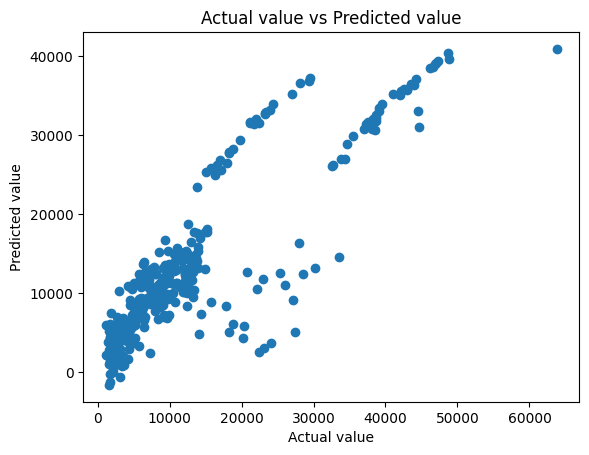

In [186]:
#scatterplot for acutal value vs predicted value
plt.scatter(y_test,predict)
plt.title('Actual value vs Predicted value')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

# **Provide interpretations of the model's findings.**

**Model Performance**

* Mean Squared Error (MSE):(35,293,689.49)
The number tells average squared error between your predicted and actual insurance charges.The model’s predictions have an average squared error of ~35 million, which reflects some larger prediction errors due to outliers.
* R-squared:(0.766)The model explains 76.6% of the variation in insurance charges based on the input features — a strong result for a basic regression model.  
